In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [11]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/auto-mpg.csv") 

# Check the first few rows to ensure data import
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [12]:
df.drop('car name', axis=1, inplace=True)

In [13]:
# Convert "horsepower" column to numeric, handling errors by replacing them with the mean
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [14]:
# Create dummy variables for the "origin" column
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

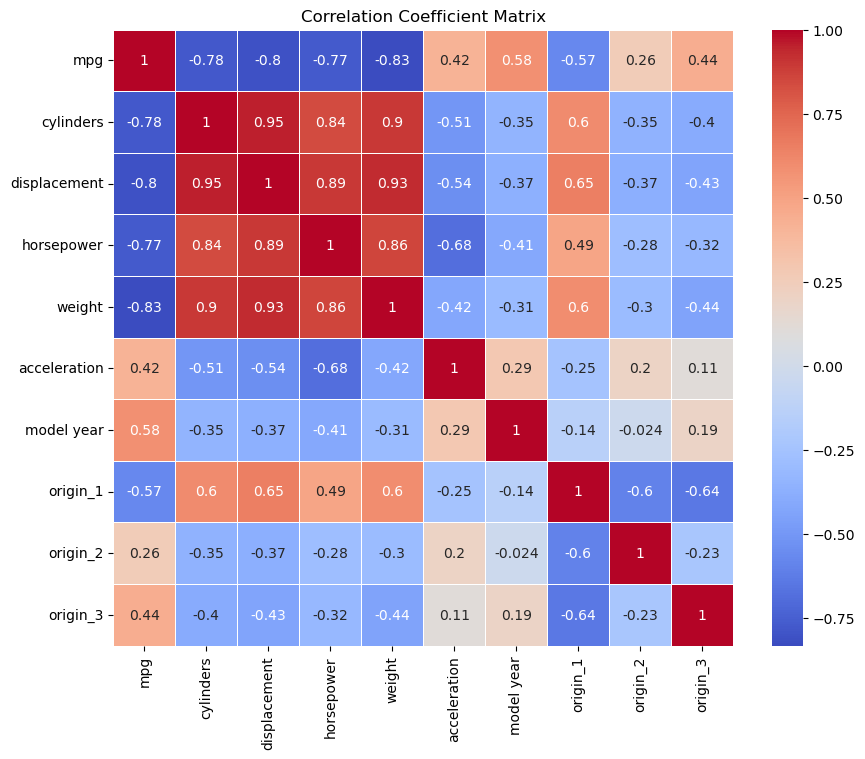

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Coefficient Matrix')
plt.show()

In [19]:
# Split the data into 80% training and 20% test sets
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate R2, RMSE, and MAE for training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R2, RMSE, and MAE for test data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Interpret the results
print(f"Training R2 Score: {r2_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")

Training R2 Score: 0.8188
Training RMSE: 3.3703
Training MAE: 2.6055
Test R2 Score: 0.8449
Test RMSE: 2.8878
Test MAE: 2.2876


In [22]:
# Initialize and train the linear regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = rfr_model.predict(X_train)
y_test_pred = rfr_model.predict(X_test)

# Calculate R2, RMSE, and MAE for training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R2, RMSE, and MAE for test data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Interpret the results
print(f"Training R2 Score: {r2_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")

Training R2 Score: 0.9817
Training RMSE: 1.0698
Training MAE: 0.7416
Test R2 Score: 0.9140
Test RMSE: 2.1501
Test MAE: 1.5685
